# INTRODUCTION TO REGRESSION ANALYSIS

# DO WORK
When you come to class:
- Run ```git pull```
- Open jupyter notebook in the DC-DC-14 folder
- Open DS-DC-14_06_intro_to_regression_analysis (remember to copy and rename to avoid merge conflict)
- run ```conda install seaborn``` 
  - if you haven't already

# LEARNING OBJECTIVES

After this lesson, you will be able to:

- Define data modeling and simple linear regression
- Build a linear regression model using a dataset that meets the linearity assumption using the sci-kit learn library
- Understand and identify multicollinearity in a multiple regression.


# STUDENT PRE-WORK

Before this lesson, you should already be able to:

- Effectively show correlations between an independent variable x and a dependent variable y
- Be familiar with the get_dummies function in pandas
- Understand the difference between vectors, matrices, Series, and DataFrames
- Understand the concepts of outliers and distance.
- Be able to interpret p values and confidence intervals


## POSSIBLE CONCERNS
**7 days until we pick our datasets and questions? Will we be ready??!**

- 7 days (minus prep time) to have 3 ideas; You don't have to pick one just yet
  - That will be by lesson 14 (about 4 weeks from now), but I encourage you to get a headstart
- By the end of today's class you would have gone through the data science workflow once aside from model evaluation. From here on out we will cover special cases, refine our understanding of the process, and improve our skills with our toolkit.

**We don't know what models are available, how can we choose data?**
- If you are looking at predictive analytics, all models follow a similar scheme. X predicts Y where X is one or more explanatory variables and Y is one or more outcomes. You can resolve the specifics later. Even if you know all the possible models you would have trouble predicting which ones you would end up with at the end of your project.
- Generally, model selection is much simpler than the research design, which is just a process of twisting a question to fit this kind of X predicts Y format.

**What if I don't want to focus on predictive analytics?**
- Come talk to John and I
- **Causal/Impact Analysis**: You probably don't have enough time in the class to get this right unless you redo a well known experiment or study using their data
- **Text/Image data**: This is predictive, we'll help you get a head start
- **Webscraping**: This can be predictive, we'll help you get a head start and encourage you to respect legal boundaries
- **Webapp**: This can be predictive, we'll help you get a head start
- **Unsupervised learning**: Maybe. It's hard to get a concrete direction with kind of project since it resembles exploratory data analysis and we require a bit more than just exploratory data analysis
- **Optimization**: This would be really cool and something I'm fond of, but we don't cover it in class and I would have to clear it with some GA staff.
- Specialized ML topics such as Market Basket Analysis, Sentiment Analysis, Recommendation Engines, Anomaly Detection, etc: Generally, are in the clear, but we can only help in a limited capacity

**What are good criteria for picking a project**
- Find something that has enough data, a few thousand rows of whatever quantity you are predicting (120 rows as an absolute minimum)
- Find something that you think you'll love
  - Even for portfolios 
    - It's easy to tell during an interview when someone was bored with their work
    - Interviewer bias: It's easy to mistake passion for skill (skill might be less important anyway)
    
**I still can't get started**
- http://www.kdnuggets.com/2015/09/questions-data-science-can-answer.html
- https://www.kaggle.com/wiki/DataScienceUseCases
- https://www.kaggle.com/wiki/PastSolutions

## Where are we in the data science workflow?

- Data has been **acquired** and **parsed**.

- Today we’ll **refine** the data and **build** models.

- We’ll also use plots to **represent** the results.

# DATA MODELING

In general while modeling we work with **Y**, our **outcomes**, and **X** our **features/predictors**

All the models we will use follow this pattern:

$$Y = f(X) + \epsilon$$

$f$ is the model, which takes a a set of values in X and predicts one or more outcomes in Y

$\epsilon$ Represents the error, our whatever our model fails to explain. The distance between our predictions and data

# SIMPLE LINEAR REGRESSION (10 mins)
Objective: Define Linear Regression

It starts with a simple correlation

A linear regression is an explanation of a continuous variable given a series of independent variables. In it's simplest form, a linear regression reminds us of a basic algebraic function - a line of best fit:

$$y = mx + b$$

However, the power of a linear regression is that we can use linear algebra to explain multiple x's together in order to explain y:

$$y = \alpha + \beta X + \epsilon$$

We used vector notation above, the big $X$ just means

$$y = \alpha + \beta_1 x_1 + \beta_2 x_2 + ... + \epsilon$$

$\alpha$ is a constant that gives use the value of $y$ when $x$ is 0

$\beta$ is the slope that tells us how much $y$ increases for a unit increase in $X$

$\epsilon$ is the error term that tells us how far off from our prediction is from the y value

**Our terminology is now:**

Given a matrix X, their relative coefficients beta, and a y-intercept alpha, explain a dependent vector, y.

or

Given a set of features, their regression coefficients, and a constant, can we predict the outcome y?

##### When should we use linear regression?
- The data is normally distributed (but doesn't have to be)
  - Our estimation becomes weaker when values are not normally distributed
- The Xs significantly explain y (have low p-values)
- The Xs are uncorrelated with each other (low multicollinearity)
- We think the associations between y and X are linear or can be transformed to be linear (dependent on problem)
  - There is some tolerance for outliers, we want the typical case to be linear, but there may be some exception that we can drop

## KNOWLEDGE CHECK

We want to see if we can predict the hourly temperate based on the hour of the day and the angle of the sun relative to the equator (Note: this angle changes VERY slowly through-out the year). Can we do a reasonable job using linear regression?

# CODEALONG: REGRESSING AND NORMAL DISTRIBUTIONS 

Objective: Demonstrate how transformations can allow us to run linear models
(10 mins)

For example, let's look at explaining the relationship between an animal's body weight, and their brain weight.

In [30]:
# Import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib inline 
# Larger plots by default
matplotlib.rcParams['figure.figsize'] = (13.0, 10.0)

In [31]:
# Read in the mammal dataset, and drop missing data.
mammals = pd.read_csv('assets/dataset/msleep/msleep.csv')

In [90]:
#Subset mammals to exclude missing rows and make a new copy of the DataFrame
mammals = mammals[mammals.brainwt.notnull()]
# Look at the counterpart of isnull() we can just get .notnull() 

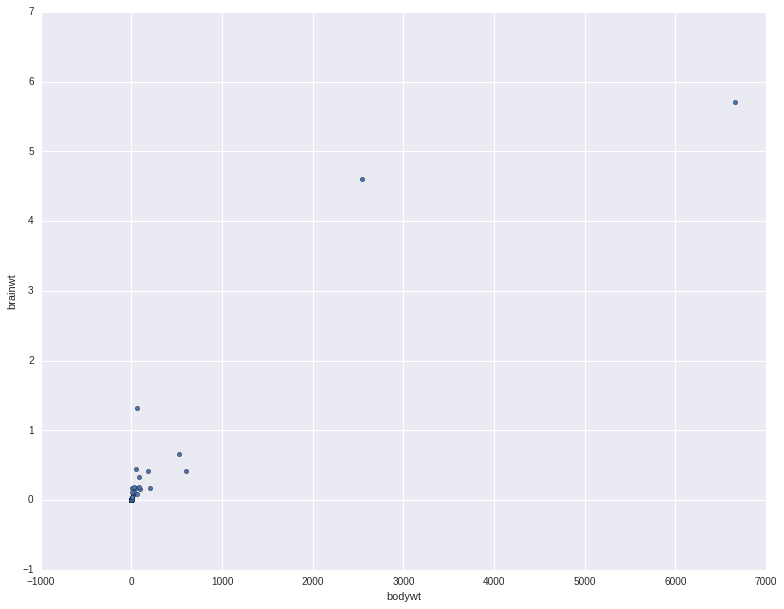

In [91]:
#Create a matplotlib scatter plot with bodywt and brainwt
mammals.plot(kind='scatter', x='bodywt', y='brainwt')

In the plot, it's apparent that there is a relationship, but it doesn't look very strong and it does not seem very linear. Using the seaborn library, we can plot the linear regression fit with these two variables:

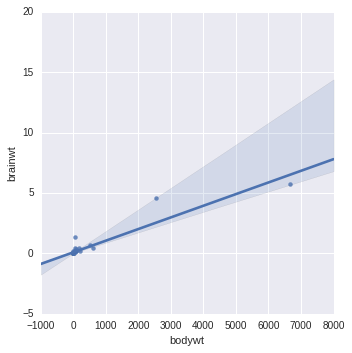

In [92]:
# Generate a plot of a single variable linear model of brain weight given body weightusing seaborn:
sns.lmplot('bodywt', 'brainwt', mammals)

**What's on the chart?**

- The blue line is a line of best fit that tries to minimize the distance from each point
- The light blue shading shows a 95% confidence interval for the best fit
- In other words we are 95% confident that the best line to summarize the relationship falls in the shaded region

**What is lmplot doing?**
- The lmplot() function returns a straight line. That is why it is a linear solution. If we had multiple variables, the solution would be a linear plane (a line in multiple dimensions).

- The linear solution does explain a portion of the data well, but because both "bodywt" and "brainwt" are log-log distributions, outliers effect the weight of the solution poorly. We can see this from the wide and inconsistently shaped confidence intervals that seaborn's lmplot generates.

**What is a log-log relationship?**
- It's when two variables are related through percentage change. In this case a unit percentage change in bodywt leads to a quantifiable percentage change in brainwt.

**What is a log?**
- It's a mathematical way of expressing magnitude. The logs of 10, 100, and 1000 are 1, 2 and 3. This also has a lot to do with percentages 1000% of 10 is 100, 1000% of 100 is 1000, and so forth. Google it! Here's a picture of a log: [log](https://upload.wikimedia.org/wikipedia/commons/4/4c/Cut_Log_with_Bowling_Ball_Pattern_on_Forest_Floor.JPG)

**How do we know this is a log-log relationship?**
- We had a hunch and inspected the chart ahead of time.
- You can guess by looking at the proportion of data points near certain values, there are exponentially more point near 10 than near 1000

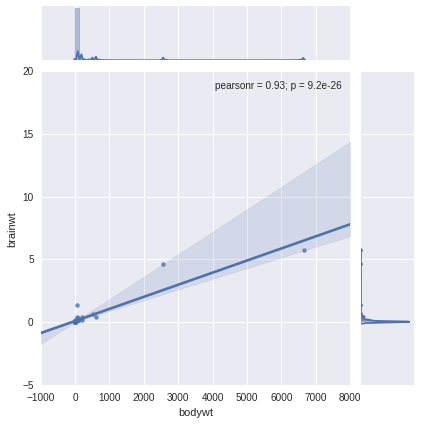

In [93]:
# Use seaborn to create a jointplot that combines histograms, a scatter plot, and a regression line
sns.jointplot("bodywt", "brainwt", mammals, kind='reg');

## KNOWLEDGE CHECK

- How much does brain weight increase for a 5000 unit increase in body weight?
- What is the skewness of the the distributions like? Negative? Neutral? Positive?
- We have a high correlation, .93, do you trust this?

##### Because both values are a log-log distribution, some math properties allow us to transform them into normal distributions. Then, we can solve for the linear regression!

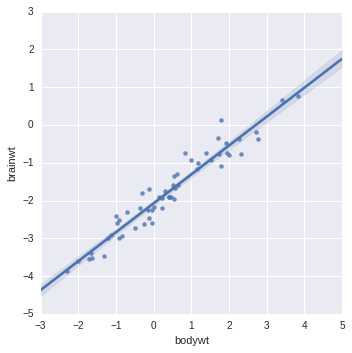

In [94]:
# Create a new data set that converts all numeric variables into log10
log_mammals = mammals[['bodywt', 'brainwt']].apply(np.log10)

# apply takes any function and runs it on every value vector/column in the DataFrame
# There's a similar method for Series!
sns.lmplot('bodywt', 'brainwt', log_mammals)

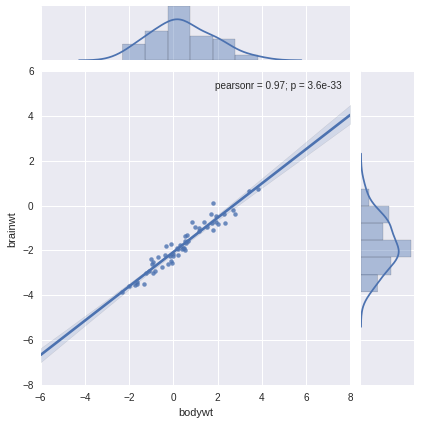

In [95]:
#Plot another jointplot to look at the distributions
sns.jointplot('bodywt', 'brainwt', log_mammals, kind='reg')

##### This is WAY better
- Notice the narrow confidence interval
- No major outliers either

##### Aren't we changing our data though?
Sort of, but it's a simple mathematical relationship that we can always change back. It's important that we correctly interperet the relationship, but the integrity is preserved
$$x = log(10^X)$$
$$x = 10^{log(X)}$$

##### Can a model figure this out for us?

- Some can
- However, they are more sophisticated and harder to interperet so there's a trade-off you have to make between being able to read your associations and having accurate predictions
- A more common approach in machine learning is to throw in several transformations and have the models pick which transformation to keep
- This same approach is generally frowned upon in causal work because it makes your coefficients innaccurate

## KNOWLEDGE CHECK: Class Challenge

How in the world do interpret that plot? What is the relationship between body weight and brain weight? 

Even though we changed the way the data was shaped, this is still a linear result: it's just linear in the log10 of the data, instead of in the data's natural state.

# PAIR PROGRAMMING: USING SEABORN TO GENERATE SIMPLE LINEAR MODEL PLOTS 
Objective: Practice using apply with DataFrames and explore log transforms
(10 mins)

Update and complete the code below to use lmplot and display correlations between body weight and two dependent variables: sleep_rem and awake.

In [ ]:
log_columns = ['bodywt', 'brainwt',]  # any others?
log_mammals = mammals.copy()
log_mammals[log_columns] = log_mammals[log_columns].apply(np.log10)

# Complete below for sleep_rem and awake as a y, with variables you've already used as x.
sns.lmplot(x, y, mammals)
sns.lmplot(x, y, log_mammals)

# SIMPLE REGRESSION ANALYSIS IN SKLEARN (10 mins)

#### Defining model objects

When modeling with sklearn, you'll use the following base principals.

- All sklearn estimators/models follow the same pattern of fit and predict 
  - This allows you to easily change estimators without changing much code.
- All estimators take a matrix/DataFrame, X, with a few variations that we'll cover in class
- Many estimators also take a vector, y, when working on a supervised machine learning problem. 
- Regressions are supervised learning because we have an outcome, y, given X.
- All estimators have parameters that modify the behavior of the estimator. In machine learning terms, we call these hyper-parameters.

**Generate an instance of an estimator class**

estimator = base_models.AnySKLearnObject()

**Fit your data**

estimator.fit(X, y)

**Score it with the default scoring method (recommended to use the metrics module in the future)**

estimator.score(X, y)

**Predict a new set of data**

estimator.predict(new_X)

**Transform a new X if changes were made to the original X while fitting**

estimator.transform(new_X)

For today, our LinearRegression() does not have a transform function... but some do! We will not be using it today.

With this information, we can build a simple process for linear regressions that take advantage of a feature_selection function and the linear regression estimator, as well as get familiar with how to implement parameters.

## KNOWLEDGE CHECK

Look at the .fit() method. What does it do? Do we always need to pass it a y column/outcome? 

# CODEALONG: SIGNIFICANCE IS KEY 
Objective: Get exposed to sklearn syntax and expand our Python knowledge (20 mins)

With the sklearn library, we can generate an sklearn model object and explore important evaluation values for linear regression.

In [96]:
# Import sklearn
from sklearn import feature_selection, linear_model

In [ ]:
# Create a DataFrame, X, with bodywt and Series, y, with brainwt
X = mammals[['bodywt']]
y = mammals['brainwt']

In [ ]:
# Initialize a linear regression object
lm = linear_model.LinearRegression()

In [97]:
# Fit the linear regression object so we have estimates of coefficients
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [101]:
# Get the pvalue of X given y. Ignore f-stat for now.
feature_selection.f_regression(X, y)[1]
# What? Why is that so hard? 
# As I've mentioned machine learning doesn't often spend much time looking at individual relationships
# So sklearn appropriately doesn't give a shortcut of p-values
# It just happens that we have an extra function to compute p-values as an extension of previous lessons

array([  9.15540205e-26])

In [99]:
# Get coefficients
lm.coef_

array([ 0.00096395])

In [100]:
# Get the constant/coefficient?
lm.intercept_

0.085917310293646632

**Did you notice how those commands had an underscore at the end?**
- This is a convention in sklearn for parameters that have been estimated by the algorithm
- These are NOT hyper-parameters

In [102]:
# Print the model R-squared
lm.score(X,y)

0.87194919808659144

R-squared also know as the coefficient of determination is one type of evaluation method. It roughly asks "What percentage of variation in our data can we explain using our model?"

(We won't go into it until later, but here are some notes on what it means, you may need to reread it 4 or 5 times.)

$$R^2 = \frac{SS_{reg}}{SS_{tot}} = \frac{\sum{(\hat{y}_i - \bar{y})^2}}{\sum{(y_i - \bar{y})^2}}$$

You can also ask "what percent of variation in our data is left unexplained?"
$$\frac{SS_{res}}{SS_{tot}}$$

It should be apparent that R-squared can also be written as:
$$R^2 = \frac{SS_{res}}{SS_{tot}} = \frac{\sum{(y_i - \hat{y}_i)^2}}{\sum{(y_i - \bar{y})^2}}$$

Let's break these down (we will take a closer look in another class)

The residual sum of squares measures total distance between our predictions and the actual values in the data.

$$SS_{res} = \sum{(y_i - \hat{y}_i)^2}$$

The regression sum of squares measures the dispersion of our predictions, kind of like the variance or standard deviation.

$$SS_{reg} = \sum{(\hat{y}_i - \bar{y})^2}$$

The total sum of squares measure the dispersion of our outcome variable, again, a lot like variance of standard deviation
$$SS_{tot} = \sum{(y_i - \bar{y})^2}$$

**What do the y's mean?**

$y_i$ refers to a single row in the outcome variable

$\hat{y}$ refers to a 'prediction' for y_i

$\bar{y}$ you should already know that this refers to the mean of outcome variable


In [63]:
# While we are at it, let's also calculate the residuals
residuals = (y-lm.predict(X)).values

(array([  1.,  30.,  22.,   1.,   0.,   1.,   0.,   1.]),
 array([-0.78803547, -0.43179303, -0.0755506 ,  0.28069184,  0.63693427,
         0.9931767 ,  1.34941914,  1.70566157,  2.06190401]),
 <a list of 8 Patch objects>)

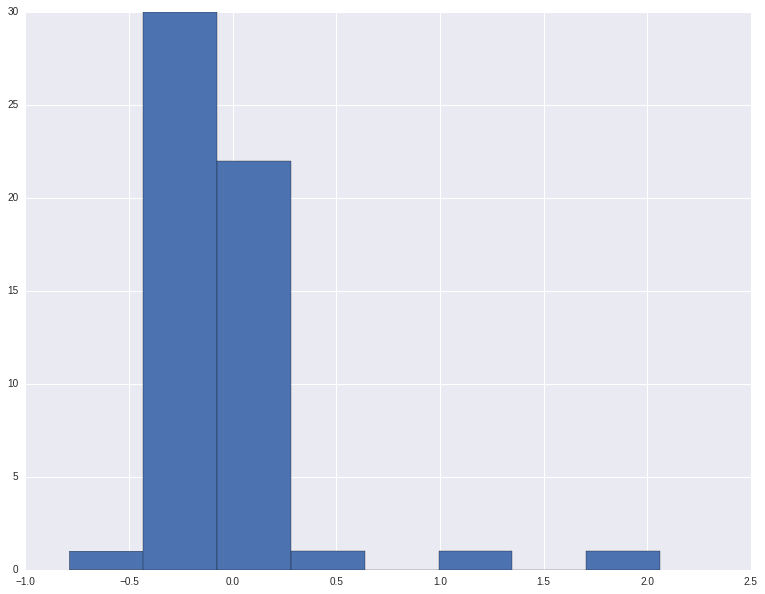

In [64]:
# Let's also plot the residuals
plt.figure()
plt.hist(residuals, bins=np.ceil(np.sqrt(len(y))))

## KNOWLEDGE CHECK
- Approximately, what's our worst prediction? 
- How far off are we? What units are we using?

## We are going to do that procedure many times, so let's make a Python function

**When should I write functions?**
- When you will repeat a procedure several times
  - Saves time typing
  - Prevents errors and typos
  - DRY principle: Don't repeat yourself
- When you need to make a piece of code easy to change
  - Say we wanted to add another metric to our function?
  - It's hard to go back and change something in 10 places
  - When you write a function you only need to change it in one place
  - Single Responsibility Principle: Every code block should have one responsibility, rephrased as every code block should have one reason to change.

Hint: Don't anticipate these too much, just rewrite some code to make things easier if you notice that the code will soon make things difficult

In [68]:
def get_linear_model_metrics(X, y, algo):
    # Get the pvalue of X given y. Ignore f-stat for now.
    pvals = feature_selection.f_regression(X, y)[1]
    # Start with an empty linear regression object
    # .fit() runs the linear regression function on X and y
    algo.fit(X,y)
    residuals = (y-algo.predict(X)).values

    # Print the necessary values
    print 'P Values:', pvals
    print 'Coefficients:', algo.coef_
    print 'y-intercept:', algo.intercept_
    print 'R-Squared:', algo.score(X,y)
    plt.figure()
    plt.hist(residuals, bins=np.ceil(np.sqrt(len(y))))

    # Keep the model
    return algo

P Values: [  9.15540205e-26]
Coefficients: [ 0.00096395]
y-intercept: 0.0859173102936
R-Squared: 0.871949198087


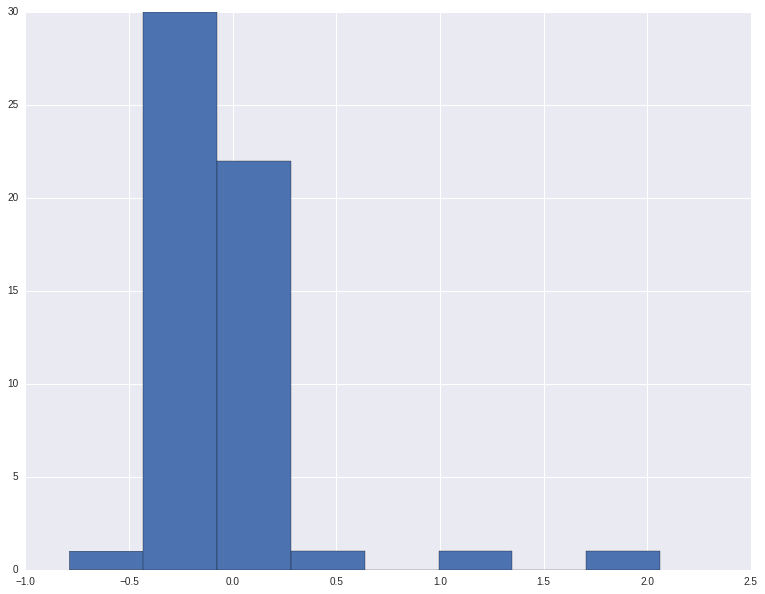

In [69]:
X = mammals[['bodywt']]
y = mammals['brainwt']
lm = linear_model.LinearRegression()
lm = get_linear_model_metrics(X, y, lm)

## KNOWLEDGE CHECK: What does our ouput tell us?

- The relationship between bodywt and brainwt isn't random (p value approaching 0)
- The model explains, roughly, 87% of the variance of the dataset (the largest errors being in the large brain and body sizes)
- With this current model, brainwt is roughly bodywt * 0.00096395
- The residuals, or error in the prediction, is not normal, with outliers on the right. A better result with will show a more normally distributed error.

#### Evaluating Fit, Evaluating [Common] Sense

Although we know there is a better solution to the model, we should evaluate some other sense things first relative to our domain knowledge and some statistics we may be aware of. 

For example, given this model, what is an animal's brainwt if their bodywt is 0?

In [67]:
# Run a prediction for a bodywt of 0
print lm.predict([[0]])

[ 0.08591731]


## KNOWLEDGE CHECK: What would we expect an animal's brainwt to be if their bodywt is 0?

Consider it a test to the model. If an animal's body weights nothing, we expect their brain to be nonexistent. That given, we can improve the model by telling sklearn's LinearRegression object we do not want to fit a y intercept.

P Values: [  9.15540205e-26]
Coefficients: [ 0.00098291]
y-intercept: 0.0
R-Squared: 0.864418807451
[ 0.]


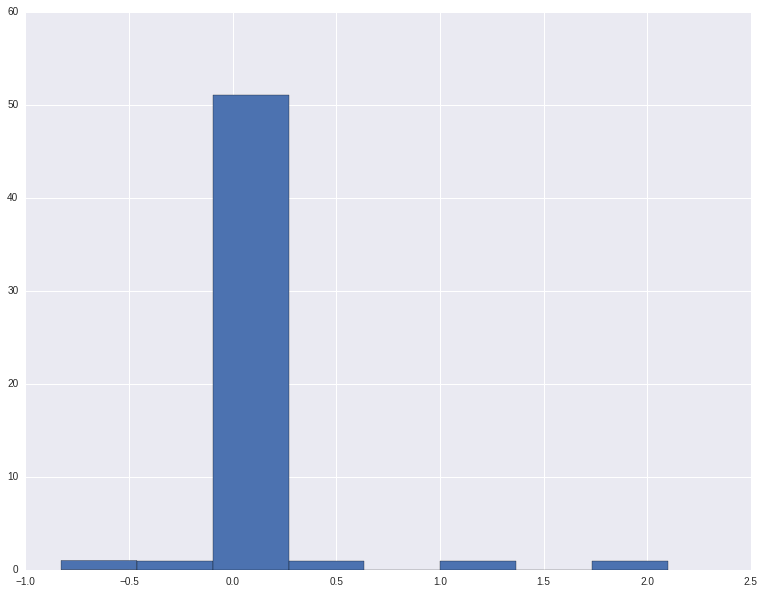

In [70]:
lm = linear_model.LinearRegression(fit_intercept=False)
lm = get_linear_model_metrics(X, y, lm)
print lm.predict([[0]])

Now, the model fits where brainwt = 0, bodywt = 0.

Because we start at 0, the large outliers have a greater effect, so the coefficient has increased.

Fitting the this linear assumption also explains slightly less of the variance.

## KNOWLEDGE CHECK: 
- Is this a better or worse model? 
- Why?

# BREAK

# PAIR PROGRAMMING: USING THE LINEAR REGRESSION OBJECT 
Objective: Practice Python and sklearn (we will see a lot more of both)
(15 mins)

We learned earlier that the the data in its current state does not allow for the best linear regression fit. With a partner, generate two more models using the log-transformed data to see how this transform changes the model's performance. Complete the following code to update X and y to match the log-transformed data. Complete the loop by setting the list to be one True and one False.

In [ ]:
X =
y =
loop = []
for boolean in loop:
    print 'y-intercept:', boolean
    lm = linear_model.LinearRegression(fit_intercept=boolean)
    get_linear_model_metrics(X, y, lm)
    print

## KNOWLEDGE CHECK 
- Out of the four, which model performed the best? The worst? Why?

#### REAL WORLD APPLICATION: INTERPRETING AND PRESENTING MODEL RESULTS
I don't have to explain why correct intepretation of a model is important and why it is important to present your results, but I can warn you of a common situation.

It should be clear that reading a model can be somewhat complicated especially if it has many transformations in it. You will often need to discuss the model with someone else before making a more formal presentation. Even if they are fully capable of interpreting a model, that person will often ask "What does this mean?"

Resist the temptation to guess and resist make interpretations on the spot, you'll probably make a mistake and have the more awkward job of correcting yourself later. 

Either work out interpretations ahead of time on a piece of paper or say that you haven't yet had a chance to carefully consider certain aspects of the model and would feel better working it out on paper.

# INDEPENDENT PRACTICE: BASE LINEAR REGRESSION CLASSES 
Objective: See how sklearn simplifies model selection and check understanding of previous syntax
(10 minutes)

We'll go into further detail on other regression techniques, but for now, experiment with the model evaluation function we have (get_linear_model_metrics) with the following sklearn estimator classes to show how easy it is to implement different estimators:

- linear_model.Lasso()
- linear_model.Ridge()
- linear_model.ElasticNet()

Re-run the fit predict procedure that we've done using the new classes rather than linear_model.LinearRegression

## KNOWLEDGE CHECK
- Did the implementation run without error? 
- What were the r-squared outputs for each estimator?

# BREAK

# MULTIPLE REGRESSION ANALYSIS
Objective: Define Multiple Regression, multicolinearity, and explore the effects of multicolinearity
 (10 minutes)

In the previous example, one variable explained the variance of another; however, more often than not, we will need multiple variables. 

- For example, a house's price may be best measured by square feet, but a lot of other variables play a vital role: bedrooms, bathrooms, location, appliances, etc. 

- For a linear regression, we want these variables to be largely independent of each other, but all of them should help explain the y variable.

We'll work with bike-share data to showcase what this means and to explain a concept called multicollinearity.

In [73]:
bike_data = pd.read_csv('assets/dataset/bikeshare/bikeshare.csv')
bike_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**What is Multicollinearity?**

With the bike share data, let's compare three data points: actual temperature, "feel" temperature, and guest ridership. Our data is already normalized between 0 and 1, so we'll start off with the correlations and modeling.

            temp     atemp    casual
temp    1.000000  0.987672  0.459616
atemp   0.987672  1.000000  0.454080
casual  0.459616  0.454080  1.000000
Axes(0.125,0.125;0.62x0.775)


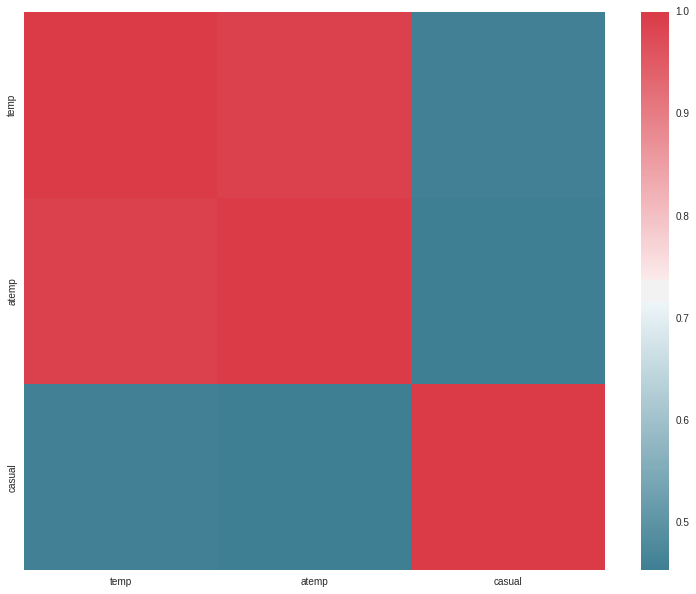

In [72]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
correlations = bike_data[['temp', 'atemp', 'casual']].corr()
print correlations
print sns.heatmap(correlations, cmap=cmap)

## KNOWLEDGE CHECK:
- What is the between actual temperature and feel temperature like?
- Is either temperature variable correlated with casual ridership?

Including both of these fields in a model could introduce a pain point of multicollinearity, where it's more difficult for a model to determine which feature is effecting the predicted value.

We can measure this effect in the coefficients:

temp
P Values: [ 0.]
Coefficients: [ 117.68705779]
y-intercept: -22.812739188
R-Squared: 0.21124654163

atemp
P Values: [ 0.]
Coefficients: [ 130.27875081]
y-intercept: -26.3071675481
R-Squared: 0.206188705733

temp, atemp
P Values: [ 0.  0.]
Coefficients: [ 116.34021588    1.52795677]
y-intercept: -22.8703398286
R-Squared: 0.21124723661



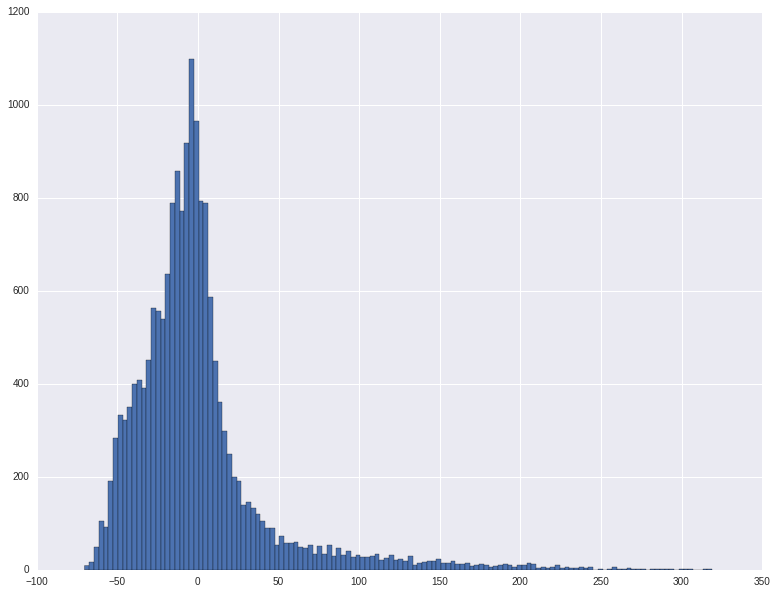

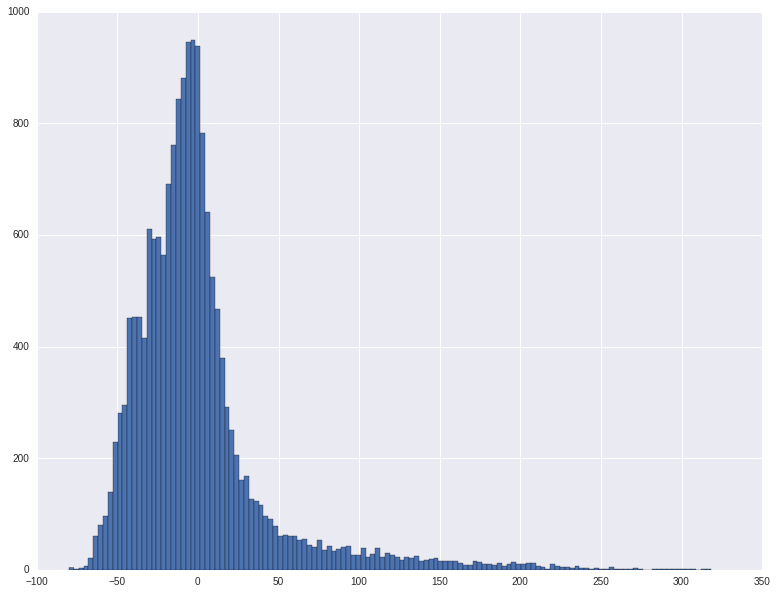

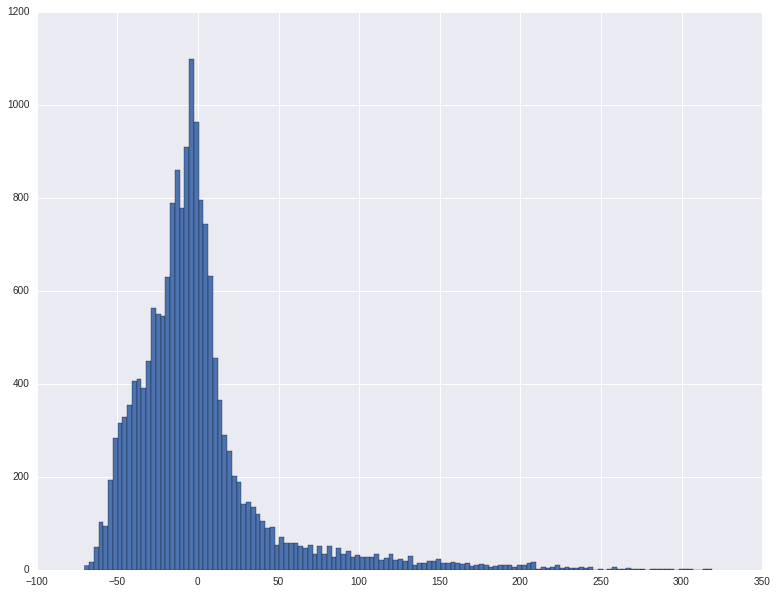

In [76]:
y = bike_data['casual']
x_sets = (
    ['temp'],
    ['atemp'],
    ['temp', 'atemp'],
)

for x in x_sets:
    print ', '.join(x) # Create a comma separated string to display our variables
    get_linear_model_metrics(bike_data[x], y, linear_model.LinearRegression())
    #Add a line in between results
    print

Even though the 2-variable model temp + atemp has a higher explanation of variance than two variables on their own, and both variables are considered significant (p values approaching 0), we can see that together, their coefficients are wildly different. This can introduce error in how we explain models.

What happens if we use a second variable that isn't highly correlated with temperature, like humidity?

While temperature's coefficient is higher, the logical output still makes sense: for guest riders we expected a positive relationship with temperature and a negative relationship with humidity, and our model suggests it as well.

## KNOWLEDGE CHECK
- What is multicollinearity? 
- Why might this cause problems in a model?

# PAIR PROGRAMMING: MULTICOLLINEARITY WITH DUMMY VARIABLES
Objective: Practice reasoning about multicolinearity

 (15 mins)

There can be a similar effect from a feature set that is a singular matrix, which is when there is a clear relationship in the matrix (for example, the sum of all rows = 1).

**What's a singular matrix?**
- https://en.wikipedia.org/wiki/Invertible_matrix
- In essence it is a linear problem that has no solution. We cannot solve for x if we cannot invert A, which is roughly equivalent to dividing by A: Ax=B

Run through the following code on your own. What happens to the coefficients when you include all weather situations instead of just including all except one?

P Values: [  3.75616929e-73   3.43170021e-22   1.57718666e-55   2.46181288e-01]
Coefficients: [ -6.99938706e+12  -6.99938706e+12  -6.99938706e+12  -6.99938706e+12]
y-intercept: 6.99938706389e+12
R-Squared: 0.0233424064678

P Values: [  3.75616929e-73   3.43170021e-22   1.57718666e-55]
Coefficients: [ 37.87876398  26.92862383  13.38900634]
y-intercept: 2.66666666676
R-Squared: 0.0233906873841


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

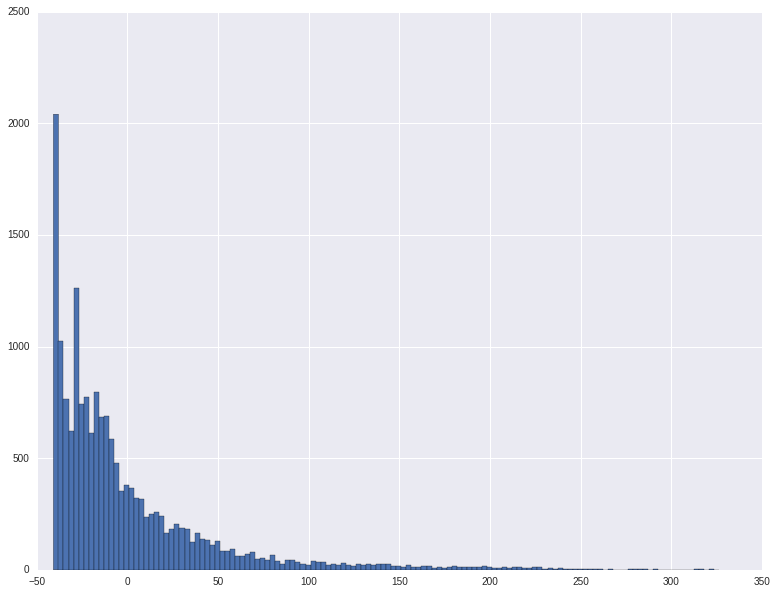

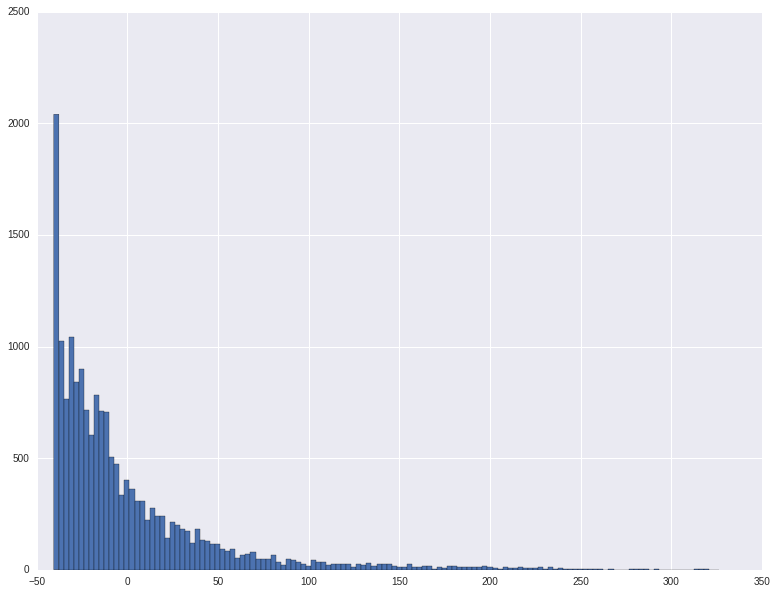

In [78]:
lm = linear_model.LinearRegression()
weather = pd.get_dummies(bike_data.weathersit)
get_linear_model_metrics(weather[[1, 2, 3, 4]], y, lm)
print

#Drop the least significant, weather situation  = 4
get_linear_model_metrics(weather[[1, 2, 3]], y, lm)

This model makes more sense, because we can more easily explain the variables compared to the one we left out. For example, this suggests that a clear day (weathersit:1) on average brings in about 38 more riders hourly than a day with heavy snow. In fact, since the weather situations "degrade" in quality (1 is the nicest day, 4 is the worst), the coefficients now reflect that well. However at this point, there is still a lot of work to do, because weather on its own fails to explain ridership well.

# PAIR PROGRAMMING: COMBINING FEATURES INTO A BETTER MODEL
Objective: Expand Pandas knowledge and identify potential associations to use in the next exercise
 (15 mins)
    
With a partner, complete this code together and visualize the correlations of all the numerical features built into the data set.

We want to:

- Add the three significant weather situations into our current model
- Find two more features that are not correlated with current features, but could be strong indicators for predicting guest riders.


In [89]:
lm = linear_model.LinearRegression()
# We haven't seen the join method yet take 5 minutes to look at the documentation and try something
# I'll give the answer shortly
bikemodel_data = bike_data.join() # add in the three weather situations

TypeError: join() takes at least 2 arguments (1 given)

In [79]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
correlations = # what are we getting the correlations of?
print correlations
print sns.heatmap(correlations, cmap=cmap)

columns_to_keep = [] #[which_variables?]
final_feature_set = bikemodel_data[columns_to_keep]

get_linear_model_metrics(final_feature_set, y, lm)

SyntaxError: invalid syntax (<ipython-input-79-731a4f0dbccd>, line 5)

## KNOWLEDGE CHECK
- Were you able to add all three conditions into the model? 
- Did you come up with two additional predictive features?

# PAIR PROGRAMMING: BUILDING MODELS FOR OTHER Y VARIABLES
(25 minutes)

We've completely a model together that explains casual guest riders. It's now your turn to build another model, but using a different y variable: registered riders.

**Pay attention to:**

- the distribution of riders (should we rescale the data?)
- checking correlations with variables and registered riders
- having a feature space (our matrix) with low multicollinearity
- model complexity vs explanation of variance: at what point do features in a model stop improving r-squared?
- the linear assumption -- given all feature values being 0, should we have no ridership? negative ridership? positive ridership?

**Bonus**

- Which variables would make sense to dummy (because they are categorical, not continuous)?
- What features might explain ridership but aren't included in the data set?
- Is there a way to build these using pandas and the features available?

**Outcomes** 

If your model at least improves upon the original model and the explanatory effects (coefficients) make sense, consider this a complete task. If your model has an r-squared above .4, this a relatively effective model for the data available. Kudos!

# Conclusion

- How do you dummy a categorical variable?
- How do you avoid a singular matrix?
- What is a single linear regression?
- What makes multi-variable regressions more useful?
- What challenges do they introduce?

# UPCOMING WORK
- Project: Final Project, Deliverable 1 DUE (Week 4 : Lesson 8)
  - https://github.com/ga-students/DS-DC-14/blob/master/projects/final-projects/01-lightning-talk/final-project-1-rubric.md
- The Unit 3 Project is now posted DUE Lesson 9
  - https://github.com/ga-students/DS-DC-14/blob/master/projects/unit-projects/project-3/readme.md

# EXIT TICKET: INTRODUCTION TO REGRESSION ANALYSIS
http://goo.gl/forms/gG5qAw9QljgkHC2q1